Saving LICI - 10 minute data.csv to LICI - 10 minute data (1).csv
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Accuracy: 0.6132971506105834

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       443
           1       1.00      0.03      0.06       294

    accuracy                           0.61       737
   macro avg       0.80      0.52      0.41       737
weighted avg       0.76      0.61      0.48       737

Confusion Matrix:
 [[443   0]
 [285   9]]


/tmp/ipython-input-3192773591.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


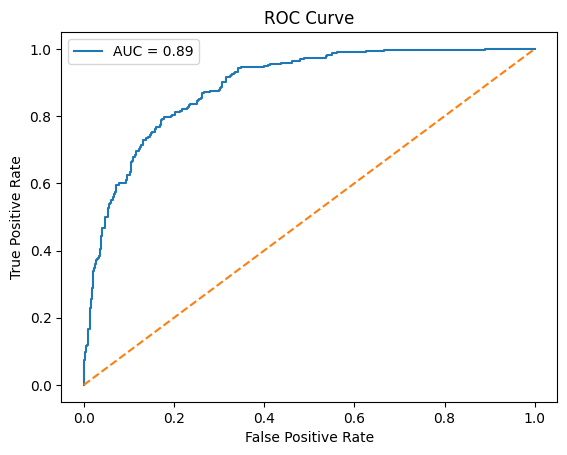

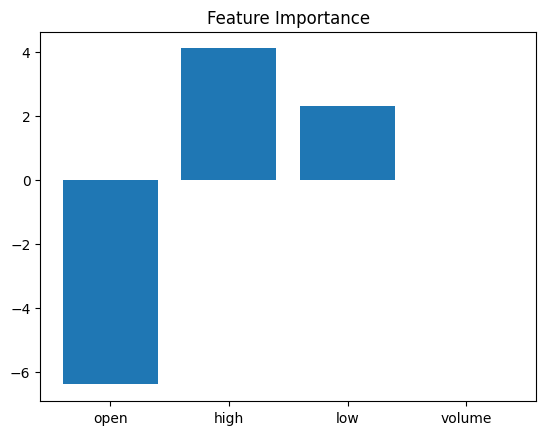

Tuned Accuracy: 0.6051560379918589


In [5]:
from google.colab import files
uploaded = files.upload()
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
# Load dataset
stock = pd.read_csv("LICI - 10 minute data.csv")
# CLEAN COLUMN NAMES (VERY IMPORTANT)
stock.columns = (
    stock.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

print(stock.columns)
# Create target variable (Price Movement)
stock['price_movement'] = np.where(
    stock['close'] > stock['open'], 1, 0
)
# Select features and target
features = ['open', 'high', 'low', 'volume']
X = stock[features]
y = stock['price_movement']

# Handle missing values
X.fillna(X.mean(), inplace=True)
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
# Feature importance
plt.bar(features, model.coef_[0])
plt.title("Feature Importance")
plt.show()
# Hyperparameter tuning
tuned_model = LogisticRegression(C=0.5, penalty='l2')
tuned_model.fit(X_train, y_train)

tuned_pred = tuned_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, tuned_pred))

